Hunter Bennett  
Glass Lab  
171211

Notebook for exploration of WGCNA R package using the liver strains data. Following the tutorial PDF for the WGCNA package found here:  

https://labs.genetics.ucla.edu/horvath/CoexpressionNetwork/Rpackages/WGCNA/Tutorials/index.html

In [1]:
# User defined functions
# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

In [2]:
getwd()

[1] "/gpfs/data01/glasslab/home/h1bennet/liverStrains/results"

In [3]:
outdir <- '180117_WGCNA/'

In [4]:
library(WGCNA)

Loading required package: dynamicTreeCut
Loading required package: fastcluster

Attaching package: ‘fastcluster’

The following object is masked from ‘package:stats’:

    hclust

Warning message:
“replacing previous import ‘stats::sd’ by ‘BiocGenerics::sd’ when loading ‘S4Vectors’”Warning message:
“replacing previous import ‘stats::var’ by ‘BiocGenerics::var’ when loading ‘S4Vectors’”Warning message:
“multiple methods tables found for ‘var’”Warning message:
“multiple methods tables found for ‘sd’”Warning message:
“multiple methods tables found for ‘rowSums’”Warning message:
“multiple methods tables found for ‘colSums’”Warning message:
“multiple methods tables found for ‘rowMeans’”Warning message:
“multiple methods tables found for ‘colMeans’”Warning message:
“replacing previous import ‘BiocGenerics::rowSums’ by ‘S4Vectors::rowSums’ when loading ‘AnnotationDbi’”Warning message:
“replacing previous import ‘BiocGenerics::var’ by ‘S4Vectors::var’ when loading ‘AnnotationDbi’”Warning messa

*
*  Package WGCNA 1.51 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=56
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=56
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*





Attaching package: ‘WGCNA’

The following object is masked from ‘package:stats’:

    cor



In [5]:
options(stringsAsFactors = FALSE)
liverData = read.csv('/home/h1bennet/liverStrains/results/180111_RNA_Seq/rnaseq_matrix_condenseGenes_exons_rpkm.txt',
                    sep='\t')

In [6]:
liverData <- liverData[-grep('chrM|random|chrX|chrY|chrUn', liverData$chr),
                      -grep('^X.*WholeLiver', colnames(liverData))]


In [7]:
table(liverData$chr)


 chr1 chr10 chr11 chr12 chr13 chr14 chr15 chr16 chr17 chr18 chr19  chr2  chr3 
 1361  1158  1845   843   943   881   910   756  1201   600   798  2062  1149 
 chr4  chr5  chr6  chr7  chr8  chr9 
 1462  1388  1301  2218  1178  1358 

In [8]:
head(liverData)

Transcript.RepeatID..cmd.analyzeRepeats.pl.rna.mm10..count.exons..condenseGenes..rpkm..d..data.mm10.Liver.RNA.aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3A_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam..data.mm10.Liver.RNA.aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3B_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam..data.mm10.Liver.RNA.aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3C_JSS_TDT_16_09_28.aj.star_shifted_from_AJ.sam..data.mm10.Liver.RNA.aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1A_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam..data.mm10.Liver.RNA.aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1B_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam..data.mm10.Liver.RNA.aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1C_JSS_TDT_16_09_28.aj.star_shifted_from_AJ.sam..data.mm10.Liver.RNA.balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3A_JSS_TDT_16_09_28.balbcj.star_shifted_from_BALBCJ.sam..data.mm10.Liver.RNA.balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3B_JSS_TDT_16_09_26.balbcj.star_shifted_from_BALBCJ.sam..data.mm10.Liver.RNA.balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3C_TDT_JSS_16_09_26.balbcj.star_shifted_from_BALBCJ.sam..data.mm10.Liver.RNA.balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3D_TDT_JSS_16_09_28.balbcj.star_shifted_from_BALBCJ.sam..data.mm10.Liver.RNA.balbc_WholeLiver_RNA_polyA_ControlDiet_30week_BALB1A_JSS_TDT_16_09_26.balbcj.star_shifted_from_BALBCJ.sam..data.mm10.Liver.RNA.balbc_WholeLiver_RNA_polyA_ControlDiet_30week_BALB1B_JSS_TDT_16_09_26.balbcj.star_shifted_from_BALBCJ.sam..data.mm10.Liver.RNA.balbc_WholeLiver_RNA_polyA_ControlDiet_30week_BALB1C_JSS_TDT_16_09_28.balbcj.star_shifted_from_BALBCJ.sam..data.mm10.Liver.RNA.NCoRWT_WholeLiver_RNA_polyA_AMLNDiet_30week_LN136C_JSS_TDT_16_09_19..data.mm10.Liver.RNA.NCoRWT_WholeLiver_RNA.polyA.AMLNDiet.30week.LN141A.JSS.TDT.16.09.21..data.mm10.Liver.RNA.NCoRWT_WholeLiver_RNA.polyA.ControlDiet.30week.LN134B.JSS.TDT.16.09.21..data.mm10.Liver.RNA.NCoRWT_WholeLiver_RNA.polyA.ControlDiet.30week.LN134C.JSS.TDT.16.09.19..data.mm10.Liver.RNA.NCoRWT_WholeLiver_RNA_polyA_ControlDiet_30week_LN134D_JSS_TDT_16_09_21..data.mm10.Kupffer.RNA.aj_KupfferTotal_RNA_polyA_AMLNDiet_30week_AJ3A_JSSTDT_16_09_26..data.mm10.Kupffer.RNA.aj_KupfferTotal_RNA_polyA_AMLNDiet_30week_AJ3B_JSSTDT_16_09_26..data.mm10.Kupffer.RNA.aj_KupfferTotal_RNA_polyA_AMLNDiet_30week_AJ3c_JSS_TDT_16_09_28..data.mm10.Kupffer.RNA.aj_KupfferTotal_RNA_polyA_ControlDiet_30week_AJ1c_JSS_TDT_16_09_28..data.mm10.Kupffer.RNA.aj_KupfferTotal_RNA_polyA_ControlDiet_30week_AJ1d_JSS_TDT_16_09_28..data.mm10.Kupffer.RNA.balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3a_JSS_TDT_16_09_28..data.mm10.Kupffer.RNA.balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3B_JSSTDT_16_09_26..data.mm10.Kupffer.RNA.balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3C_JSSTDT_16_09_26..data.mm10.Kupffer.RNA.balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3d_JSS_TDT_16_09_28..data.mm10.Kupffer.RNA.balbc_KupfferTotal_RNA_polyA_ControlDiet_30week_Balb1c_JSS_TDT_16_09_28..data.mm10.Kupffer.RNA.balbc_KupfferTotal_RNA_polyA_ControlDiet_30week_Balb1d_JSS_TDT_16_09_28..data.mm10.Kupffer.RNA.NCoRWT_KupfferTotal_RNA_polyA_AMLNDiet_30week_LN136C_JSS_TDT_16_09_19..data.mm10.Kupffer.RNA.NCoRWT_KupfferTotal_RNA_polyA_AMLNDiet_30week_LN141A_JSS_TDT_16_09_21..data.mm10.Kupffer.RNA.NCoRWT_KupfferTotal_RNA_polyA_ControlDiet_30week_LN134B_JSS_TDT_16_09_21..data.mm10.Kupffer.RNA.NCoRWT_KupfferTotal_RNA_polyA_ControlDiet_30week_LN134C_JSS_TDT_16_09_19..data.mm10.Kupffer.RNA.NCoRWT_KupfferTotal_RNA_polyA_ControlDiet_30week_LN134D_JSS_TDT_16_09_21.,chr,start,end,strand,Length,Copies,Annotation.Divergence,X.data.mm10.Kupffer.RNA.aj_KupfferTotal_RNA_polyA_AMLNDiet_30week_AJ3A_JSSTDT_16_09_26.FPKM,X.data.mm10.Kupffer.RNA.aj_KupfferTotal_RNA_polyA_AMLNDiet_30week_AJ3B_JSSTDT_16_09_26.FPKM,⋯,X.data.mm10.Kupffer.RNA.balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3B_JSSTDT_16_09_26.FPKM,X.data.mm10.Kupffer.RNA.balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3C_JSSTDT_16_09_26.FPK

In [9]:
datExpr0 = as.data.frame(t(liverData));
datExpr0 = datExpr0[-c(1:8),]
datExpr0 <- sapply(datExpr0, as.numeric)
colnames(datExpr0) <- liverData[, 1]
row_labs = strsplit(names(liverData[,-(1:8)]), "\\.")
row_labs = do.call("rbind", lapply(row_labs, "[[", 6))
rownames(datExpr0) <- row_labs

In [10]:
# check samples to see if we have too many missing values
gsg = goodSamplesGenes(datExpr0, verbose = 3);
gsg$allOK

 Flagging genes and samples with too many missing values...
  ..step 1
  ..Excluding 4752 genes from the calculation due to too many missing samples or zero variance.
  ..step 2


[1] FALSE

In [11]:
# remove samples or genes with too much missing data
if (!gsg$allOK)
{
# Optionally, print the gene and sample names that were removed:
if (sum(!gsg$goodGenes)>0)
printFlush(paste("Removing genes:", paste(names(datExpr0)[!gsg$goodGenes], collapse = ", ")));
if (sum(!gsg$goodSamples)>0)
printFlush(paste("Removing samples:", paste(rownames(datExpr0)[!gsg$goodSamples], collapse = ", ")));
# Remove the offending genes and samples from the data:
datExpr0 = datExpr0[gsg$goodSamples, gsg$goodGenes]
}

Removing genes: 


In [12]:
# Further remove genes - Inge recommends getting your gene pool down to around ~10k to facilitate analysis
dim(datExpr0)

[1]    16 18660

In [13]:
# Require highly expressed genes, in this case RPKM > 2 across more than two samples
datExpr0 = datExpr0[, colSums(datExpr0 > 2) > 2]

In [14]:
dim(datExpr0)

[1]    16 10946

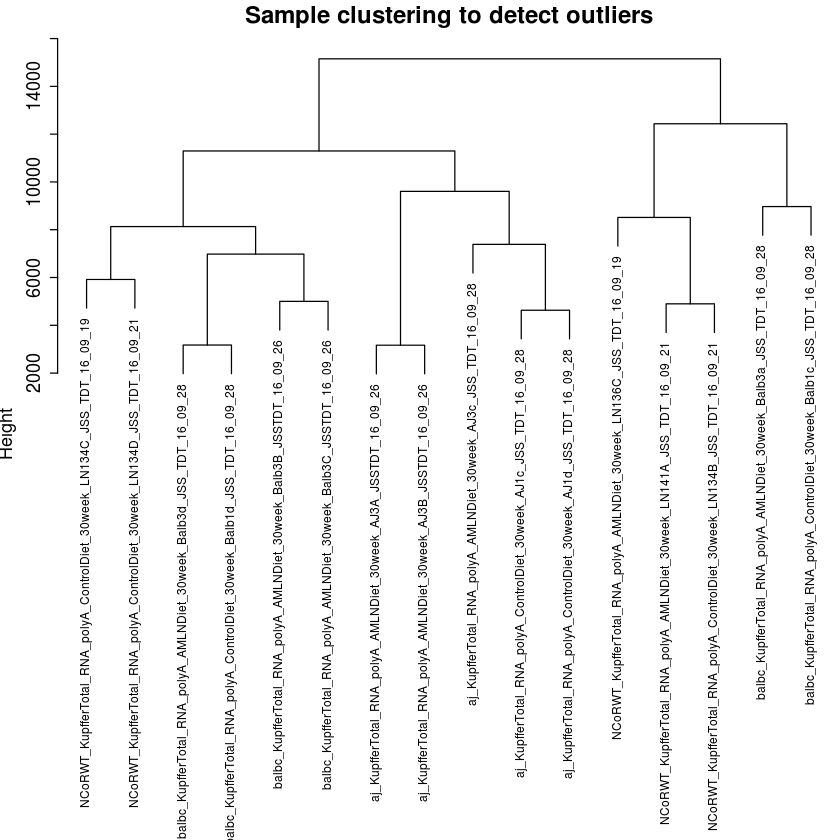

In [15]:
#cluster samples to see if we have outliers
sampleTree = hclust(dist(datExpr0), method = "average");
# Plot the sample tree: Open a graphic output window of size 12 by 9 inches
# The user should change the dimensions if the window is too large or too small.|
#pdf(file = "Plots/sampleClustering.pdf", width = 12, height = 9);
par(cex = 0.6);
par(mar = c(0,4,2,0))
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="", cex.lab = 1.5,
    cex.axis = 1.5, cex.main = 2)

In [16]:
# Remove outliers here, we seem to be okay though!
# Determine cluster under the line
# clust <- cutreeStatic(sampleTree, cutHeight = 600000, minSize = 10)
# table(clust)
# clust 1 contains the samples we want to keep.
# keepSamples <- (clust==1)
# datExpr <- datExpr0[keepSamples, ]
# nGenes =<-ncol(datExpr)
# nSamples <- nrow(datExpr)
datExpr <- datExpr0

In [17]:
# now we load in the "clinical trait data"
traitData <- read.csv('/home/h1bennet/liverStrains/results/171208_RNA_Seq/amln_samples.txt',
                    sep='\t')
dim(traitData)
names(traitData)

[1] 34 11

[1] "X"            "subject"      "sample_type"  "path"         "batch"       
 [6] "strain"       "diet"         "group"        "group_tissue" "exclusion"   
[11] "color"

In [18]:
# remove unneeded traits
allTraits <- traitData[, -c(1, 4, 10)];
kup <- (traitData$sample_type=='kupffer')
allTraits <- allTraits[kup,]
# # remove 3A
# allTraits <- allTraits[-6,]

In [19]:
# make data frame matching expression set that holds clinical traits
kupSamples <- gsub('\\.FPKM', '', rownames(datExpr));
traitRows <- match(kupSamples, allTraits$subject);
datTraits <- allTraits[traitRows, -1];
rownames(datTraits) <- allTraits[traitRows, 1];

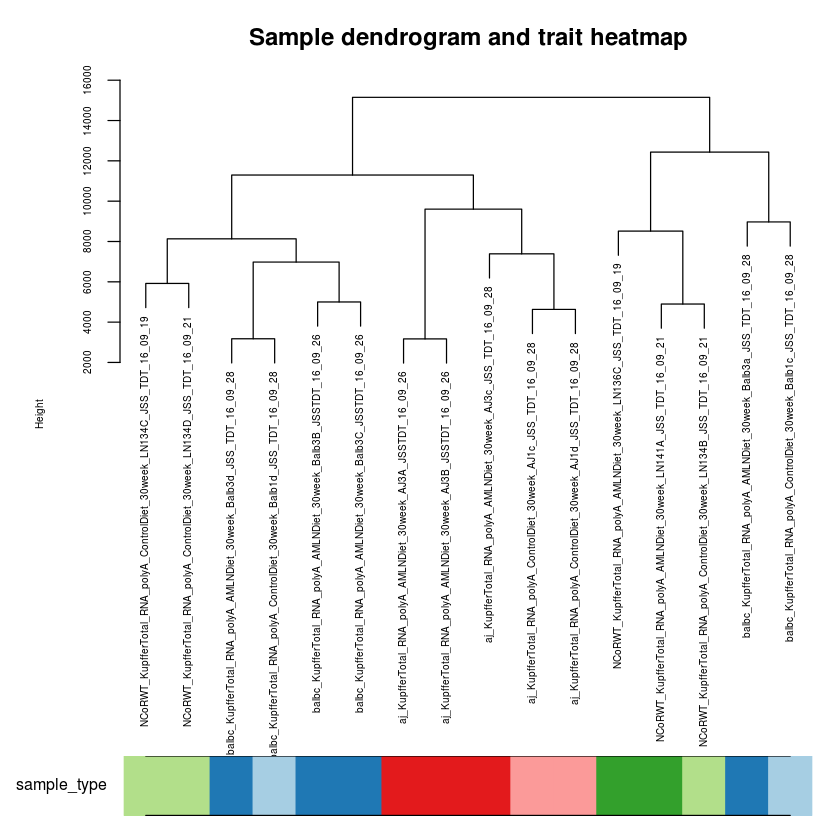

In [20]:
# Re-cluster samples
sampleTree2 = hclust(dist(datExpr), method = "average")
# Convert traits to a color representation: white means low, red means high, grey means missing entry
traitColors = datTraits$color;
# Plot the sample dendrogram and the colors underneath.
plotDendroAndColors(sampleTree2, traitColors,
                    groupLabels = names(datTraits),
                    main = "Sample dendrogram and trait heatmap",
                    xlab="", cex.lab = 0.5,
                    cex.axis = 0.5, cex.dendroLabels=0.5,
                    autoColorHeight = FALSE, colorHeight = 0.1)

In [21]:
save(datExpr, datTraits, file = paste0(outdir,"amlnKupffer-01-dataInput.RData"))

In [22]:
# if starting here..
lnames = load(file = paste0(outdir,"amlnKupffer-01-dataInput.RData"));

In [23]:
# Do initial WGCNA analysis
# enable multithreads
enableWGCNAThreads(nThreads=16)

Allowing parallel execution with up to 16 working processes.


pickSoftThreshold: will use block size 4087.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 4087 of 10946
   ..working on genes 4088 through 8174 of 10946
   ..working on genes 8175 through 10946 of 10946
   Power SFT.R.sq  slope truncated.R.sq mean.k. median.k. max.k.
1      1   0.6920  2.840          0.986  3900.0    3930.0   5440
2      2   0.2750  0.626          0.958  1980.0    1930.0   3570
3      3   0.0522 -0.182          0.899  1190.0    1090.0   2640
4      4   0.4350 -0.579          0.922   780.0     673.0   2070
5      5   0.6700 -0.835          0.945   547.0     438.0   1690
6      6   0.7850 -1.010          0.960   401.0     297.0   1410
7      7   0.8480 -1.120          0.972   304.0     211.0   1210
8      8   0.8790 -1.200          0.977   237.0     155.0   1040
9      9   0.9040 -1.260          0.982   188.0     117.0    914
10    10   0.9170 -1.300          0.986   153.0      88.8    809
11    12   0.9250 -1.380      

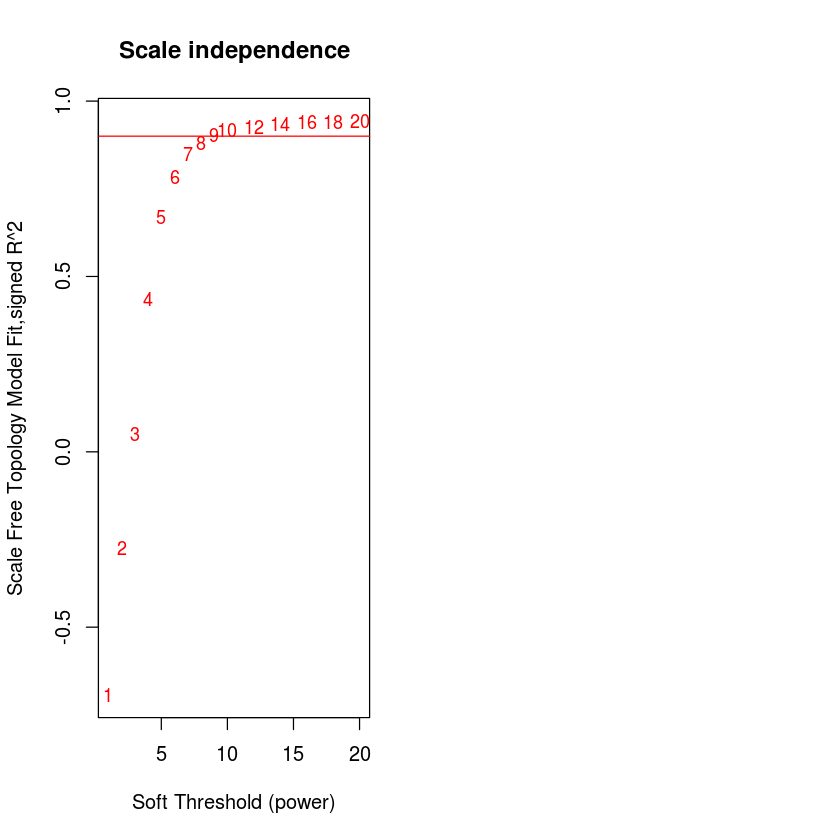

In [69]:
# Choose a set of soft-thresholding powers
powers = c(c(1:10), seq(from = 12, to=20, by=2))
# Call the network topology analysis function
sft = pickSoftThreshold(datExpr, powerVector = powers, verbose = 5)
# Plot the results:
par(mfrow = c(1,2));
cex1 = 0.9;
# Scale-free topology fit index as a function of the soft-thresholding power
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
main = paste("Scale independence"));
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
labels=powers,cex=cex1,col="red");
# this line corresponds to using an R^2 cut-off of h
abline(h=0.90,col="red")

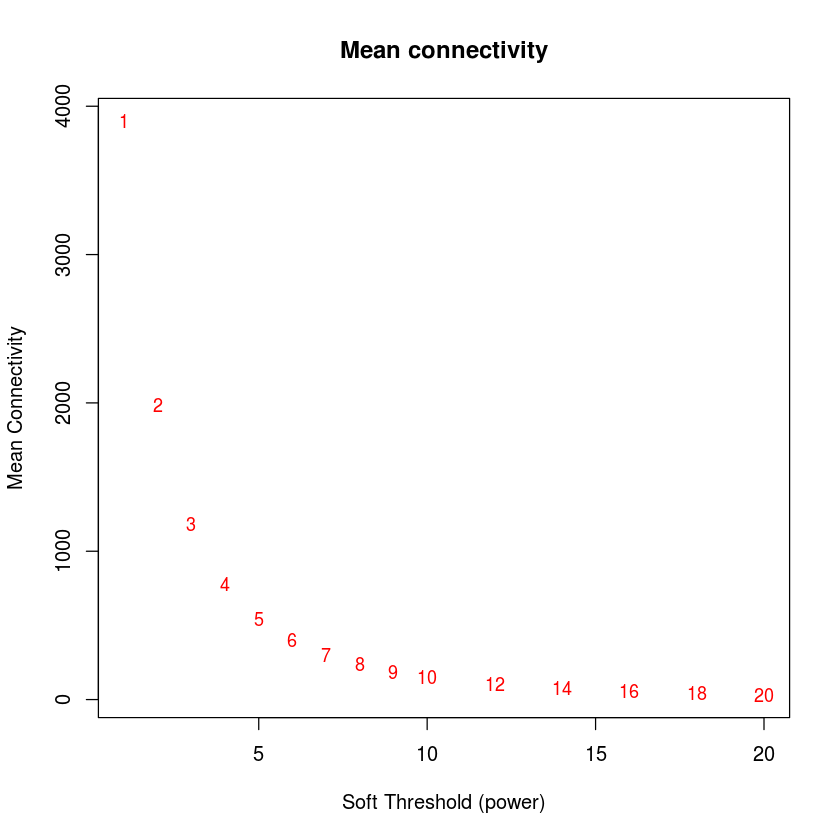

In [70]:
# Mean connectivity as a function of the soft-thresholding power
plot(sft$fitIndices[,1], sft$fitIndices[,5],
xlab="Soft Threshold (power)",ylab="Mean Connectivity", type="n",
main = paste("Mean connectivity"))
text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, cex=cex1,col="red")

### This is the 'one step' method for network construction

In [71]:
# currently we are just running this 'out of the box' settings except for a higher max block
# can use more blocks because we have a cluster with sig more RAM
# net = blockwiseModules(datExpr, power = 20,
#                        TOMType = "signed", minModuleSize = 250,
#                        reassignThreshold = 0, mergeCutHeight = 0.25,
#                        detectCutHeight = 0.99,
#                        numericLabels = TRUE, pamStage=TRUE,
#                        pamRespectsDendro = FALSE,
#                        saveTOMs = TRUE,
#                        saveTOMFileBase = paste0(outdir, "kupfferTOM"),
#                        verbose = 3,
#                        maxBlockSize=20000)

In [72]:
# nnames = load(paste0(outdir, "kupfferTOM-block.1.RData"))

In [73]:
# summary(TOM)

In [74]:
## Convert labels to colors for plotting
# mergedColors = labels2colors(net$colors)
# Plot the dendrogram and the module colors underneath
# plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
#         "Module colors",
#         dendroLabels = FALSE, hang = 0.03,
#         addGuide = TRUE, guideHang = 0.05)

In [75]:
# moduleLabels = net$colors
# moduleColors = labels2colors(net$colors)
# MEs = net$MEs;
# geneTree = net$dendrograms[[1]];
# save(MEs, moduleLabels, moduleColors, geneTree,
#      file = paste0(outdir, "kupfferTOM-02-networkConstruction-auto.RData"))

### Instead here we will do the "long" way
____
taken from the excellent tutorial for WGCNA  

https://labs.genetics.ucla.edu/horvath/CoexpressionNetwork/Rpackages/WGCNA/Tutorials/FemaleLiver-02-networkConstr-man.pdf

In [24]:
# calculate the adjacencies
softPower = 20
adjacency = adjacency(datExpr, power = softPower);

In [23]:
# Turn adjacency into topological overlap 
# have to re-run this with a signed network :(
TOM = TOMsimilarity(adjacency, TOMType="signed", verbose=2);
dissTOM = 1-TOM

..connectivity..
..matrix multiplication..
..normalization..
..done.


In [25]:
### Lets check how different the gene tree is using the mean function instead of min...
TOM_mean = TOMsimilarity(adjacency, TOMType="signed", TOMDenom='mean', verbose=2);
dissTOM_mean = 1-TOM_mean

..connectivity..
..matrix multiplication..
..normalization..
..done.


In [29]:
save(TOM, dissTOM, TOM_mean, dissTOM_mean, file = paste0(outdir,"180117_WGCNA_TOM.RData"))

In [28]:
tnames = load(file = paste0(outdir,"180117_WGCNA_TOM.RData"));

In [27]:
tnames

ERROR: Error in eval(expr, envir, enclos): object 'tnames' not found


In [30]:
# Call the hierarchical clustering function
geneTree = hclust(as.dist(dissTOM), method = "average");

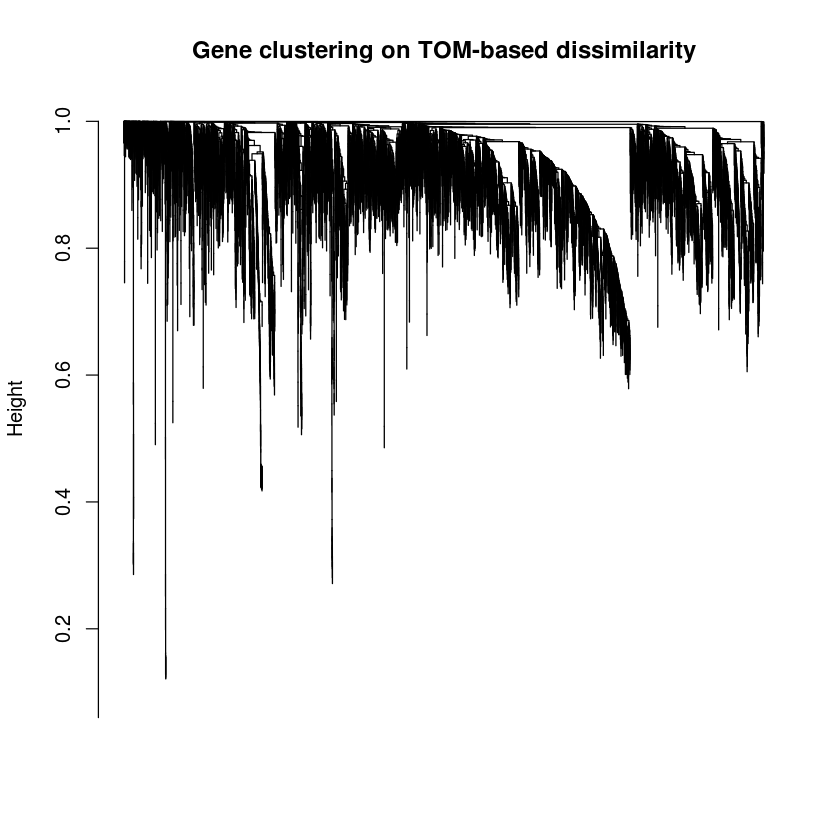

In [31]:
plot(geneTree, xlab="", sub="", main = "Gene clustering on TOM-based dissimilarity",
labels = FALSE, hang = 0.04);

In [32]:
geneTree_mean = hclust(as.dist(dissTOM_mean), method = "average");

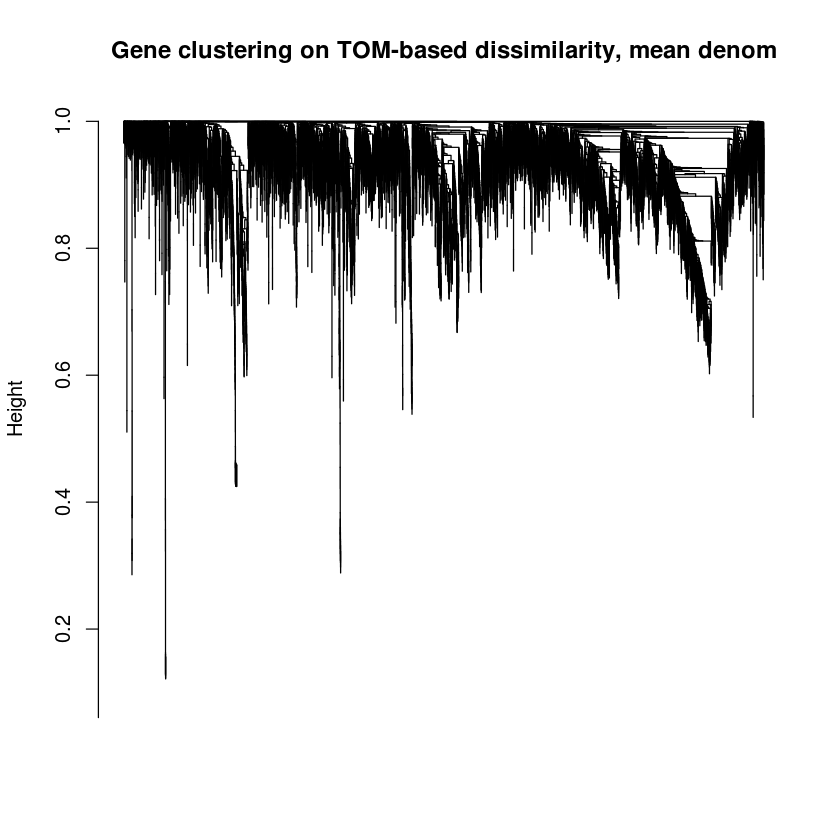

In [33]:
plot(geneTree_mean, xlab="", sub="", main = "Gene clustering on TOM-based dissimilarity, mean denom",
labels = FALSE, hang = 0.04);

On its face this clustering doesn't look appreciably better than the min denominator default setting for TOMSimilarity measurement generation

# Next we will explore the settings for the dendrogram

## For the Mean Clustering

In [46]:
# lets first look at how pamRespectsDendro changes things...
minModuleSize = 200;
# Module identification using dynamic tree cut:
dynamicMods200Tree_mean = cutreeDynamic(
    dendro=geneTree_mean, cutHeight=NULL,
    minClusterSize=minModuleSize,
    method="tree")

# Module identification using dynamic tree cut:
dynamicMods200Hybrid_mean = cutreeDynamic(
    dendro=geneTree_mean, cutHeight=NULL,
    minClusterSize=minModuleSize,
    method="hybrid", distM=dissTOM,
    pamStage=TRUE, pamRespectsDendro=FALSE)

 ..cutHeight not given, setting it to 0.998  ===>  99% of the (truncated) height range in dendro.
 ..done.


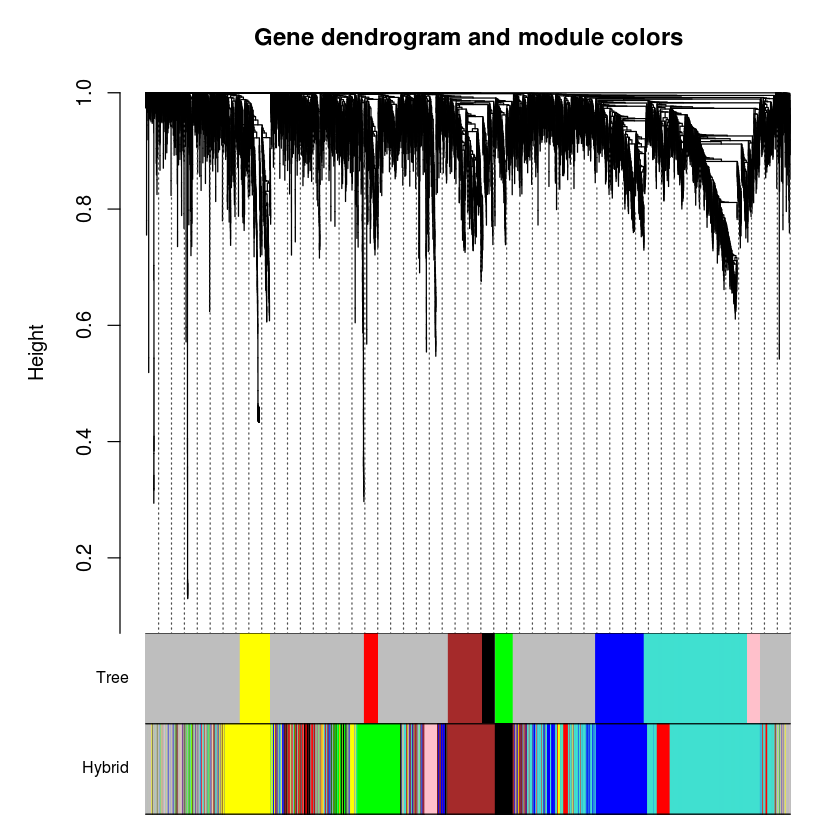

In [48]:
# Convert numeric lables into colors
dynamicColors = cbind(labels2colors(dynamicMods200Tree_mean), labels2colors(dynamicMods200Hybrid_mean))

# Plot the dendrogram and colors underneath
plotDendroAndColors(geneTree_mean, dynamicColors, c("Tree", "Hybrid"),
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05,
main = "Gene dendrogram and module colors")

In [50]:
# lets first look at how pamRespectsDendro changes things...
# We like large modules, so we set the minimum module size relatively high:
minModuleSize = 100;
# Module identification using dynamic tree cut:
dynamicMods100RD_mean = cutreeDynamic(
    dendro=geneTree_mean, cutHeight=NULL,
    minClusterSize=minModuleSize,
    method="hybrid", distM=dissTOM,
    pamStage=TRUE, pamRespectsDendro=TRUE)

# We like large modules, so we set the minimum module size relatively high:
minModuleSize = 100;
# Module identification using dynamic tree cut:
dynamicMods100_mean = cutreeDynamic(
    dendro=geneTree_mean, cutHeight=NULL,
    minClusterSize=minModuleSize,
    method="hybrid", distM=dissTOM,
    pamStage=TRUE, pamRespectsDendro=FALSE)

# Module identification using dynamic tree cut:
dynamicMods100NoPAM_mean = cutreeDynamic(
    dendro=geneTree_mean, cutHeight=NULL,
    minClusterSize=minModuleSize,
    method="hybrid", distM=dissTOM,
    pamStage=FALSE, pamRespectsDendro=FALSE)

 ..cutHeight not given, setting it to 0.998  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.998  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.998  ===>  99% of the (truncated) height range in dendro.
 ..done.


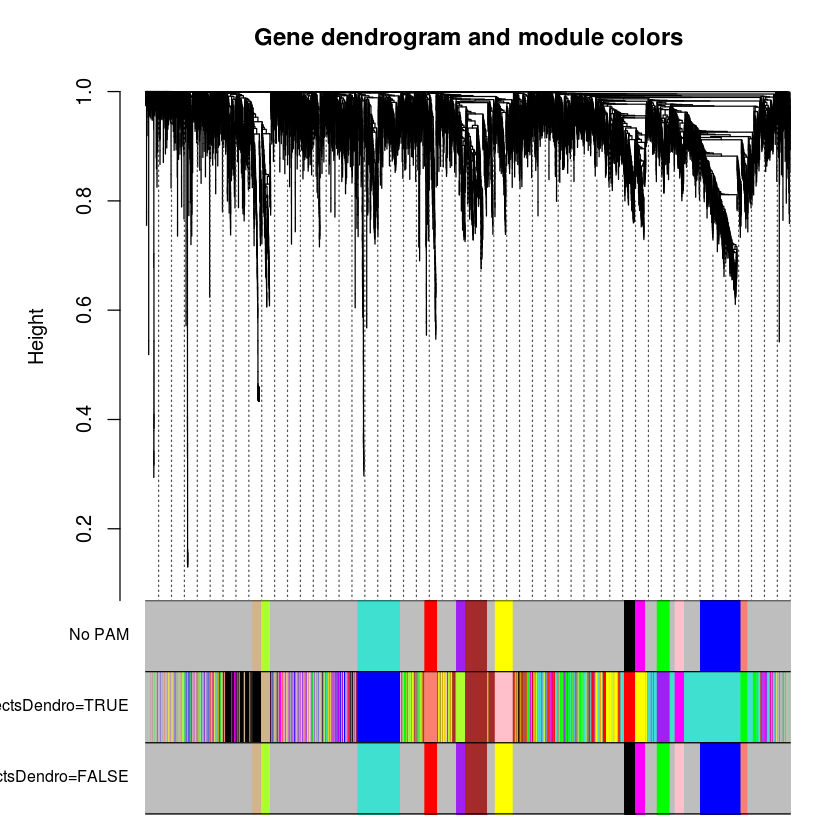

In [51]:
# Convert numeric lables into colors
dynamicColors = cbind(labels2colors(dynamicMods100NoPAM_mean),
                      labels2colors(dynamicMods100_mean),
                      labels2colors(dynamicMods100NoPAM_mean))

# Plot the dendrogram and colors underneath
plotDendroAndColors(geneTree_mean, dynamicColors, c("No PAM", "respectsDendro=TRUE", "respectsDendro=FALSE"),
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05,
main = "Gene dendrogram and module colors")

In [57]:
# Module identification using dynamic tree cut:
dynamicMods150_mean = cutreeDynamic(
    dendro=geneTree_mean, cutHeight=NULL,
    minClusterSize=150,
    method="hybrid", distM=dissTOM,
    pamStage=TRUE, pamRespectsDendro=FALSE)

dynamicMods200_mean = cutreeDynamic(
    dendro=geneTree_mean, cutHeight=NULL,
    minClusterSize=200,
    method="hybrid", distM=dissTOM,
    pamStage=TRUE, pamRespectsDendro=FALSE)

dynamicMods250_mean = cutreeDynamic(
    dendro=geneTree_mean, cutHeight=NULL,
    minClusterSize=200,
    method="hybrid", distM=dissTOM,
    pamStage=TRUE, pamRespectsDendro=FALSE)

 ..cutHeight not given, setting it to 0.998  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.998  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.998  ===>  99% of the (truncated) height range in dendro.
 ..done.


In [53]:
dynamicMods150RD_mean = cutreeDynamic(
    dendro=geneTree_mean, cutHeight=NULL,
    minClusterSize=150,
    method="hybrid", distM=dissTOM,
    pamStage=TRUE, pamRespectsDendro=TRUE)

dynamicMods200RD_mean = cutreeDynamic(
    dendro=geneTree_mean, cutHeight=NULL,
    minClusterSize=200,
    method="hybrid", distM=dissTOM,
    pamStage=TRUE, pamRespectsDendro=TRUE)

dynamicMods250RD_mean = cutreeDynamic(
    dendro=geneTree_mean, cutHeight=NULL,
    minClusterSize=200,
    method="hybrid", distM=dissTOM,
    pamStage=TRUE, pamRespectsDendro=TRUE)

 ..cutHeight not given, setting it to 0.998  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.998  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.998  ===>  99% of the (truncated) height range in dendro.
 ..done.


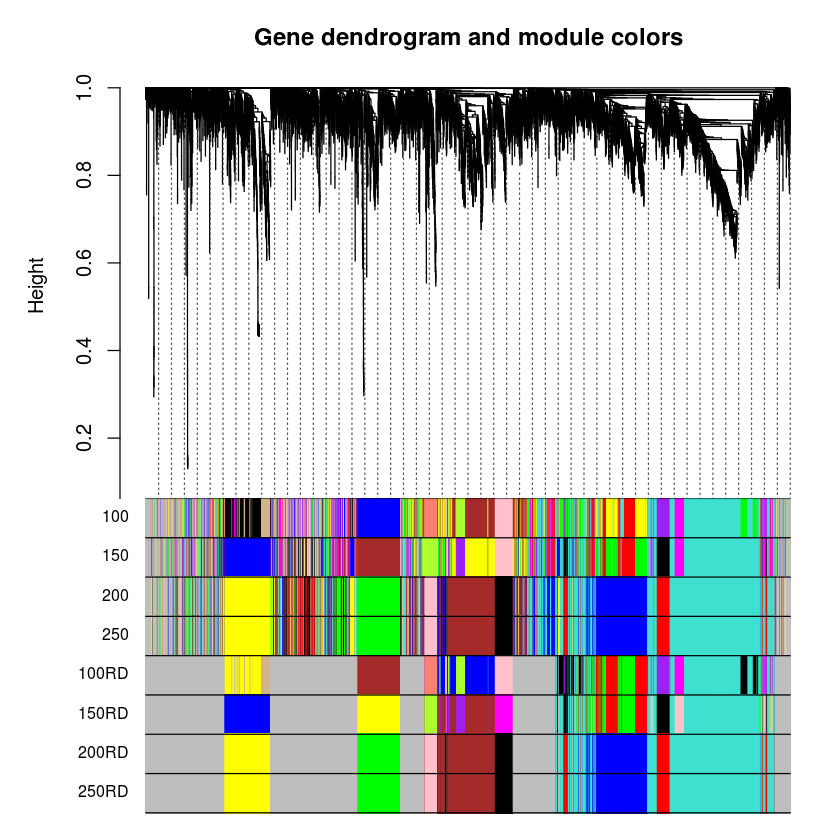

In [62]:
# Convert numeric lables into colors
dynamicColors = cbind(labels2colors(dynamicMods100_mean), labels2colors(dynamicMods150_mean),
                      labels2colors(dynamicMods200_mean), labels2colors(dynamicMods250_mean),
                      labels2colors(dynamicMods100RD_mean), labels2colors(dynamicMods150RD_mean),
                      labels2colors(dynamicMods200RD_mean), labels2colors(dynamicMods250RD_mean))

# Plot the dendrogram and colors underneath
plotDendroAndColors(geneTree_mean, dynamicColors, c("100", "150", "200", "250", "100RD", "150RD", "200RD", "250RD"),
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05,
main = "Gene dendrogram and module colors")

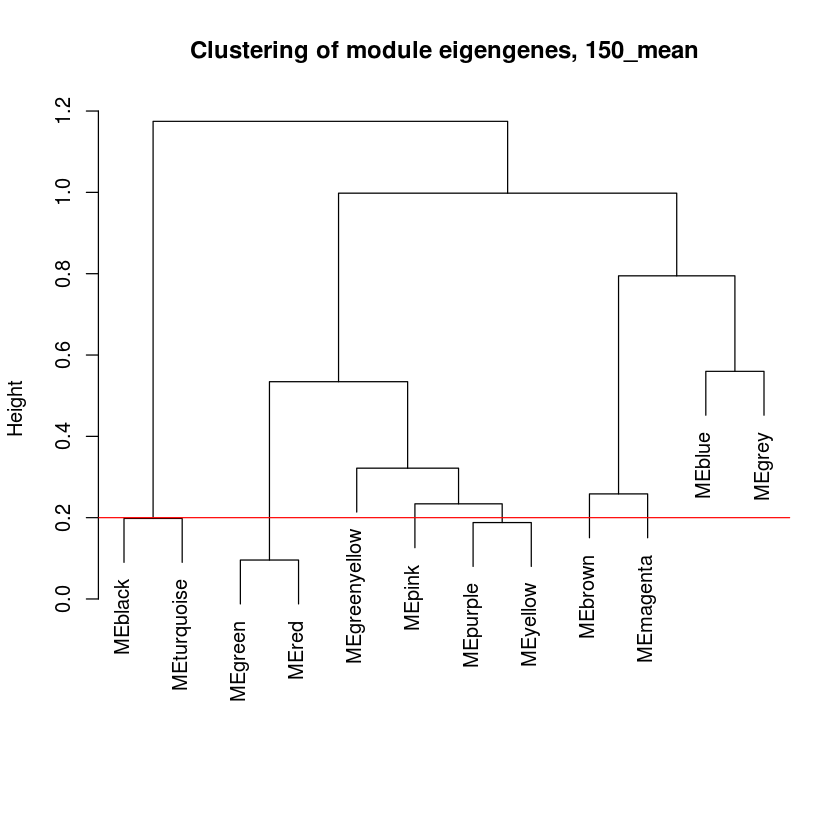

In [58]:
dynamicColors150_mean = labels2colors(dynamicMods150_mean)

# Calculate eigengenes
MEList150_mean = moduleEigengenes(datExpr, colors = dynamicColors150_mean)
MEs150_mean = MEList150_mean$eigengenes
# Calculate dissimilarity of module eigengenes
MEDiss150_mean = 1-cor(MEs150_mean);
# Cluster module eigengenes
METree150_mean = hclust(as.dist(MEDiss150_mean), method = "average");
# Plot the result
plot(METree150_mean, main = "Clustering of module eigengenes, 150_mean",
xlab = "", sub = "")
MEDissThres = 0.20
# Plot the cut line into the dendrogram
abline(h=MEDissThres, col = "red")

In [59]:
# Call an automatic merging function
merge150_mean = mergeCloseModules(datExpr, dynamicColors150_mean, cutHeight = MEDissThres, verbose = 3)
# The merged module colors
mergedColors150_mean = merge150_mean$colors;
# Eigengenes of the new merged modules:
mergedMEs150_mean = merge150_mean$newMEs;

 mergeCloseModules: Merging modules whose distance is less than 0.2
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 12 module eigengenes in given set.
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 9 module eigengenes in given set.
   Calculating new MEs...
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 9 module eigengenes in given set.


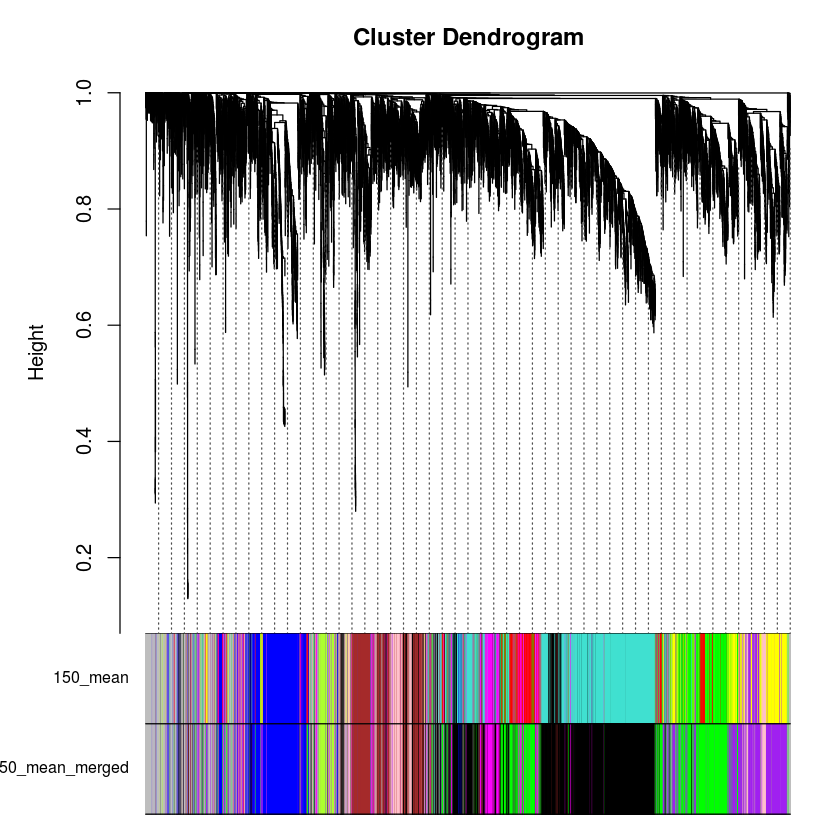

In [61]:
# Lets check the merging?
plotDendroAndColors(geneTree, cbind(dynamicColors150_mean, mergedColors150_mean),
c("150_mean", "150_mean_merged"),
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

## For the Min Clustering

In [28]:
# lets first look at how pamRespectsDendro changes things...
minModuleSize = 200;
# Module identification using dynamic tree cut:
dynamicMods200Tree = cutreeDynamic(
    dendro=geneTree, cutHeight=NULL,
    minClusterSize=minModuleSize,
    method="tree")

# Module identification using dynamic tree cut:
dynamicMods200Hybrid = cutreeDynamic(
    dendro=geneTree, cutHeight=NULL,
    minClusterSize=minModuleSize,
    method="hybrid", distM=dissTOM,
    pamStage=TRUE, pamRespectsDendro=FALSE)

 ..cutHeight not given, setting it to 0.997  ===>  99% of the (truncated) height range in dendro.
 ..done.


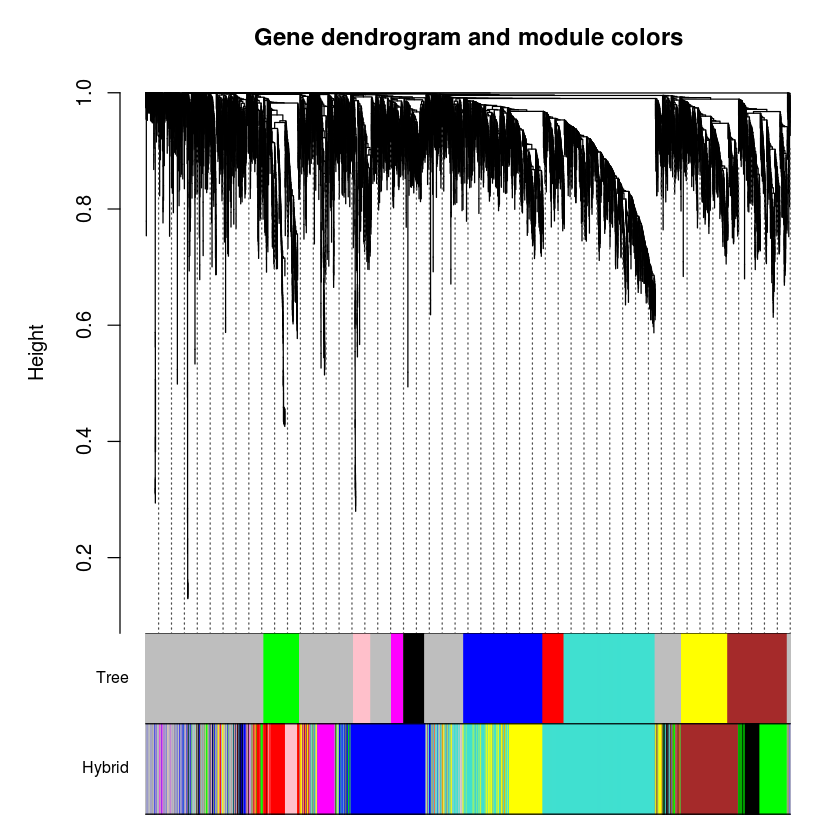

In [29]:
# Convert numeric lables into colors
dynamicColors = cbind(labels2colors(dynamicMods200Tree), labels2colors(dynamicMods200Hybrid))

# Plot the dendrogram and colors underneath
plotDendroAndColors(geneTree, dynamicColors, c("Tree", "Hybrid"),
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05,
main = "Gene dendrogram and module colors")

In [30]:
# lets first look at how pamRespectsDendro changes things...
# We like large modules, so we set the minimum module size relatively high:
minModuleSize = 100;
# Module identification using dynamic tree cut:
dynamicMods100RD = cutreeDynamic(
    dendro=geneTree, cutHeight=NULL,
    minClusterSize=minModuleSize,
    method="hybrid", distM=dissTOM,
    pamStage=TRUE, pamRespectsDendro=TRUE)

# We like large modules, so we set the minimum module size relatively high:
minModuleSize = 100;
# Module identification using dynamic tree cut:
dynamicMods100 = cutreeDynamic(
    dendro=geneTree, cutHeight=NULL,
    minClusterSize=minModuleSize,
    method="hybrid", distM=dissTOM,
    pamStage=TRUE, pamRespectsDendro=FALSE)

# Module identification using dynamic tree cut:
dynamicMods100NoPAM = cutreeDynamic(
    dendro=geneTree, cutHeight=NULL,
    minClusterSize=minModuleSize,
    method="hybrid", distM=dissTOM,
    pamStage=FALSE, pamRespectsDendro=FALSE)

 ..cutHeight not given, setting it to 0.997  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.997  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.997  ===>  99% of the (truncated) height range in dendro.
 ..done.


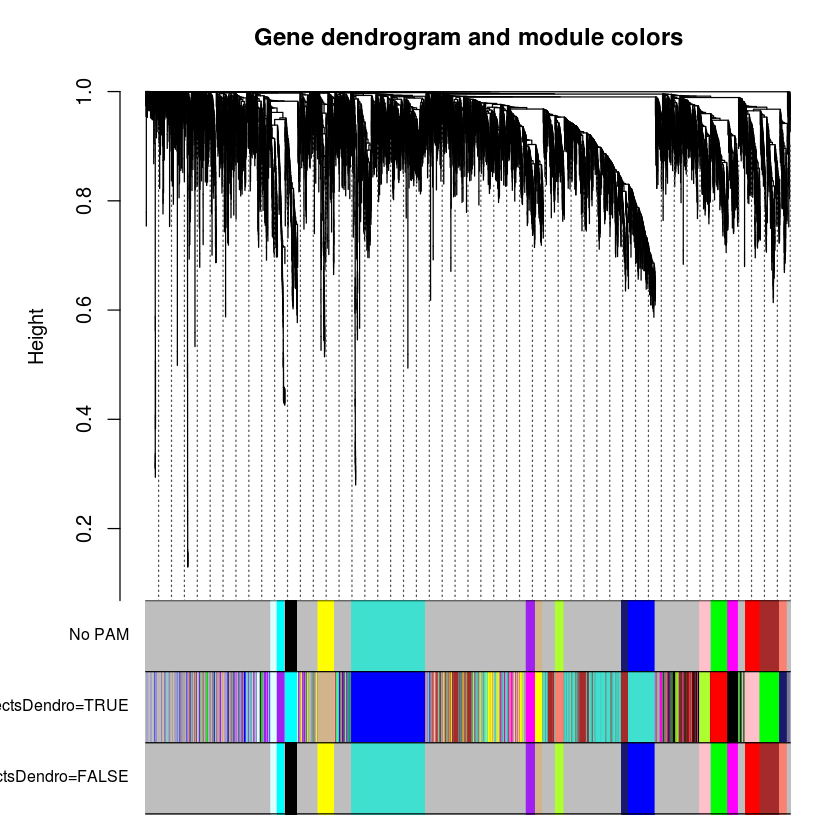

In [31]:
# Convert numeric lables into colors
dynamicColors = cbind(labels2colors(dynamicMods100NoPAM), labels2colors(dynamicMods100), labels2colors(dynamicMods100NoPAM))

# Plot the dendrogram and colors underneath
plotDendroAndColors(geneTree, dynamicColors, c("No PAM", "respectsDendro=TRUE", "respectsDendro=FALSE"),
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05,
main = "Gene dendrogram and module colors")

PAM respects dendro seems to incorporate more unassigned genes into clusters which could be nice. The other clusters seem fairly robust, lets try adjusting the module size as well...

In [32]:
# Module identification using dynamic tree cut:
dynamicMods150 = cutreeDynamic(
    dendro=geneTree, cutHeight=NULL,
    minClusterSize=150,
    method="hybrid", distM=dissTOM,
    pamStage=TRUE, pamRespectsDendro=FALSE)

dynamicMods200 = cutreeDynamic(
    dendro=geneTree, cutHeight=NULL,
    minClusterSize=200,
    method="hybrid", distM=dissTOM,
    pamStage=TRUE, pamRespectsDendro=FALSE)

dynamicMods250 = cutreeDynamic(
    dendro=geneTree, cutHeight=NULL,
    minClusterSize=200,
    method="hybrid", distM=dissTOM,
    pamStage=TRUE, pamRespectsDendro=FALSE)

 ..cutHeight not given, setting it to 0.997  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.997  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.997  ===>  99% of the (truncated) height range in dendro.
 ..done.


In [33]:
dynamicMods150RD = cutreeDynamic(
    dendro=geneTree, cutHeight=NULL,
    minClusterSize=150,
    method="hybrid", distM=dissTOM,
    pamStage=TRUE, pamRespectsDendro=TRUE)

dynamicMods200RD = cutreeDynamic(
    dendro=geneTree, cutHeight=NULL,
    minClusterSize=200,
    method="hybrid", distM=dissTOM,
    pamStage=TRUE, pamRespectsDendro=TRUE)

dynamicMods250RD = cutreeDynamic(
    dendro=geneTree, cutHeight=NULL,
    minClusterSize=200,
    method="hybrid", distM=dissTOM,
    pamStage=TRUE, pamRespectsDendro=TRUE)

 ..cutHeight not given, setting it to 0.997  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.997  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.997  ===>  99% of the (truncated) height range in dendro.
 ..done.


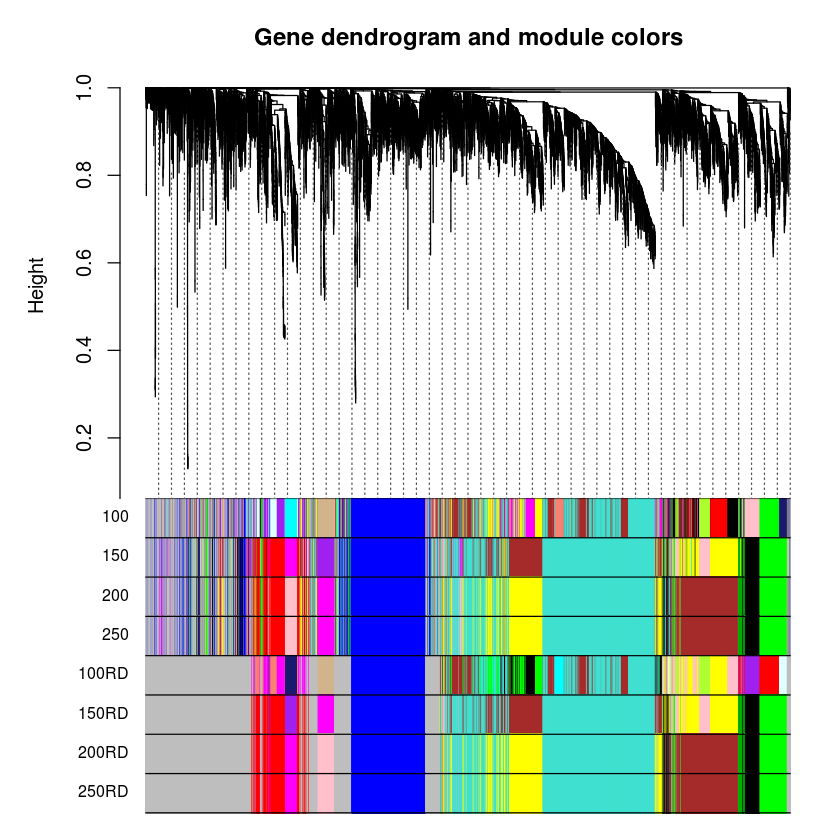

In [34]:
# Convert numeric lables into colors
dynamicColors = cbind(labels2colors(dynamicMods100), labels2colors(dynamicMods150),
                      labels2colors(dynamicMods200), labels2colors(dynamicMods250),
                      labels2colors(dynamicMods100RD), labels2colors(dynamicMods150RD),
                      labels2colors(dynamicMods200RD), labels2colors(dynamicMods250RD))

# Plot the dendrogram and colors underneath
plotDendroAndColors(geneTree, dynamicColors, c("100", "150", "200", "250", "100RD", "150RD", "200RD", "250RD"),
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05,
main = "Gene dendrogram and module colors")

250/200 min cluster size seem to form the clearest clusters. that are neatly aligned with the dendrogram. Themain clusters seem to be largely the same with PAM respects dendro on or off, we are basically  just increasing the number of genes we pick up by having it not respect the dendrogram.

Next lets look at the cut height parameter.

In [35]:
dynamicMods97 = cutreeDynamic(
    dendro=geneTree, cutHeight=0.97,
    minClusterSize=200,
    method="hybrid", distM=dissTOM,
    pamStage=TRUE, pamRespectsDendro=TRUE)

dynamicMods98 = cutreeDynamic(
    dendro=geneTree, cutHeight=0.98,
    minClusterSize=200,
    method="hybrid", distM=dissTOM,
    pamStage=TRUE, pamRespectsDendro=TRUE)

dynamicMods99 = cutreeDynamic(
    dendro=geneTree, cutHeight=0.99,
    minClusterSize=200,
    method="hybrid", distM=dissTOM,
    pamStage=TRUE, pamRespectsDendro=TRUE)

dynamicMods995 = cutreeDynamic(
    dendro=geneTree, cutHeight=0.995,
    minClusterSize=200,
    method="hybrid", distM=dissTOM,
    pamStage=TRUE, pamRespectsDendro=TRUE)

 ..done.
 ..done.
 ..done.
 ..done.


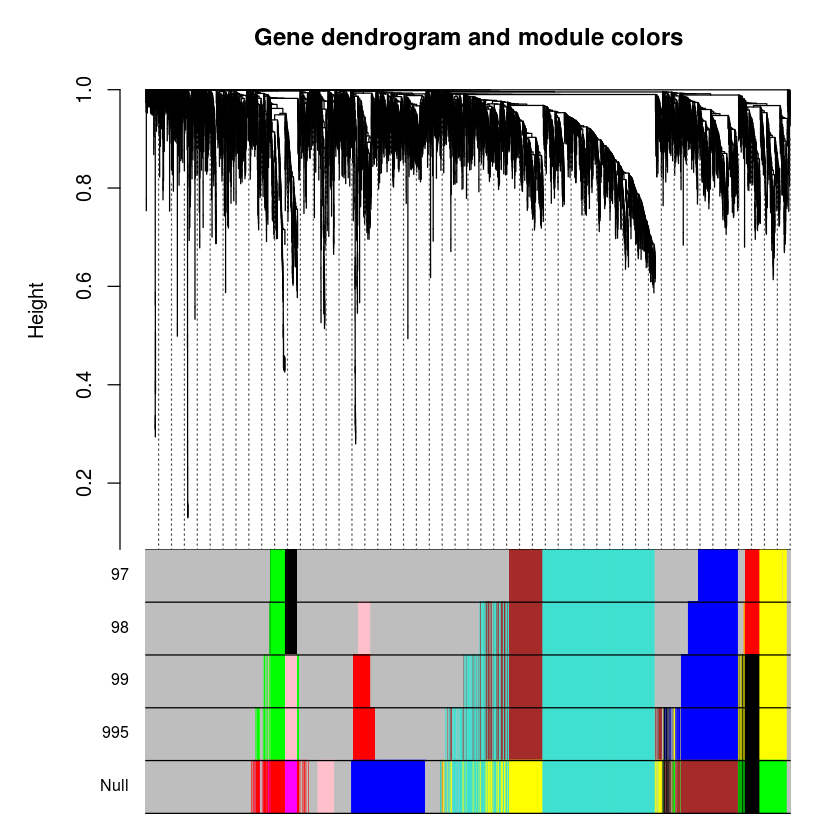

In [36]:
# Convert numeric lables into colors
dynamicColors = cbind(labels2colors(dynamicMods97), labels2colors(dynamicMods98),
                      labels2colors(dynamicMods99), labels2colors(dynamicMods995),
                      labels2colors(dynamicMods200RD))

# Plot the dendrogram and colors underneath
plotDendroAndColors(geneTree, dynamicColors, c("97", "98", "99", "995", "Null"),
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05,
main = "Gene dendrogram and module colors")

The Null Setting (99 percentile cut height) looks pretty good!

### Next lets look to see if any of the modules correlate with each other?

In [37]:
dynamicMods200 = cutreeDynamic(
    dendro=geneTree, cutHeight=NULL,
    minClusterSize=200,
    method="hybrid", distM=dissTOM,
    pamStage=TRUE, pamRespectsDendro=FALSE)

dynamicMods200RD = cutreeDynamic(
    dendro=geneTree, cutHeight=NULL,
    minClusterSize=200,
    method="hybrid", distM=dissTOM,
    pamStage=TRUE, pamRespectsDendro=TRUE)

 ..cutHeight not given, setting it to 0.997  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.997  ===>  99% of the (truncated) height range in dendro.
 ..done.


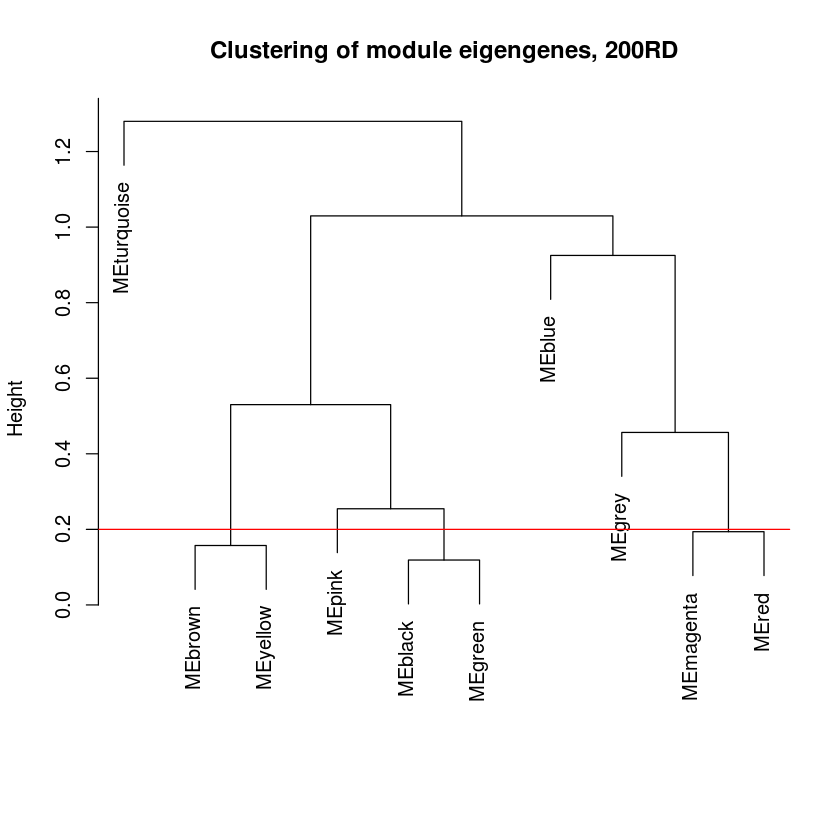

In [38]:
dynamicColors200RD = labels2colors(dynamicMods200RD)
dynamicColors200 = labels2colors(dynamicMods200)

# Calculate eigengenes
MEList200RD = moduleEigengenes(datExpr, colors = dynamicColors200RD)
MEsRD = MEList200RD$eigengenes
# Calculate dissimilarity of module eigengenes
MEDissRD = 1-cor(MEsRD);
# Cluster module eigengenes
METreeRD = hclust(as.dist(MEDissRD), method = "average");
# Plot the result
plot(METreeRD, main = "Clustering of module eigengenes, 200RD",
xlab = "", sub = "")
MEDissThres = 0.20
# Plot the cut line into the dendrogram
abline(h=MEDissThres, col = "red")

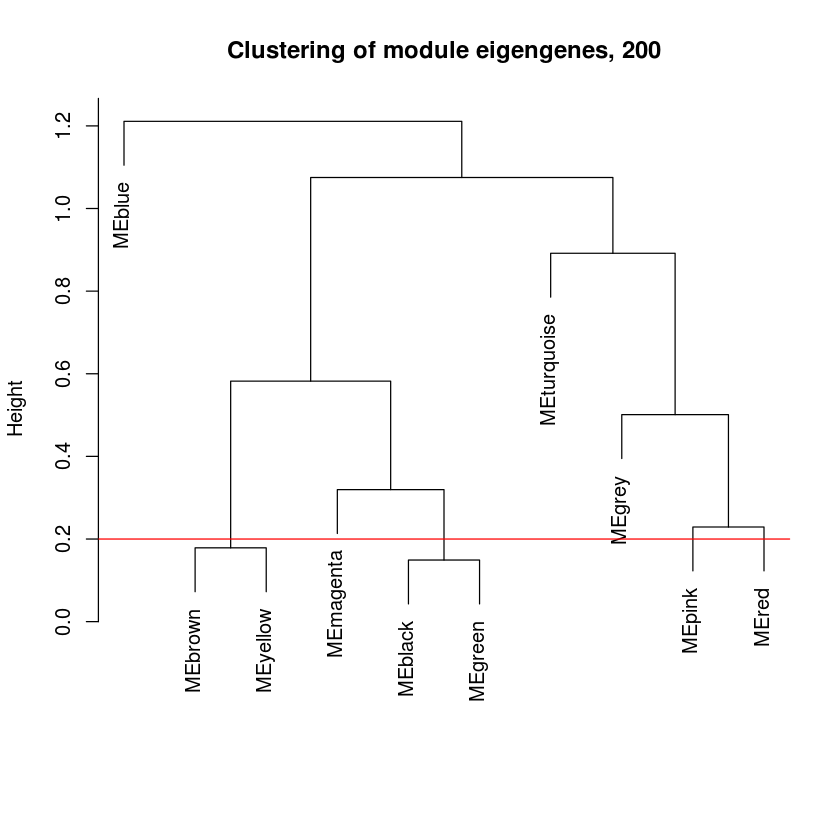

In [39]:
# Calculate eigengenes
MEList200 = moduleEigengenes(datExpr, colors = dynamicColors200)
MEs = MEList200$eigengenes
# Calculate dissimilarity of module eigengenes
MEDiss = 1-cor(MEs);
# Cluster module eigengenes
METree = hclust(as.dist(MEDiss), method = "average");
# Plot the result
plot(METree, main = "Clustering of module eigengenes, 200",
xlab = "", sub = "")
MEDissThres = 0.20
# Plot the cut line into the dendrogram
abline(h=MEDissThres, col = "red")

In [40]:
# Call an automatic merging function
merge200 = mergeCloseModules(datExpr, dynamicColors200, cutHeight = MEDissThres, verbose = 3)
# The merged module colors
mergedColors200 = merge200$colors;
# Eigengenes of the new merged modules:
mergedMEs200 = merge200$newMEs;

 mergeCloseModules: Merging modules whose distance is less than 0.2
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 10 module eigengenes in given set.
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 8 module eigengenes in given set.
   Calculating new MEs...
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 8 module eigengenes in given set.


In [41]:
# Call an automatic merging function
merge200RD = mergeCloseModules(datExpr, dynamicColors200RD, cutHeight = MEDissThres, verbose = 3)
# The merged module colors
mergedColors200RD = merge200RD$colors;
# Eigengenes of the new merged modules:
mergedMEs200RD = merge200RD$newMEs;

 mergeCloseModules: Merging modules whose distance is less than 0.2
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 10 module eigengenes in given set.
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 7 module eigengenes in given set.
   Calculating new MEs...
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 7 module eigengenes in given set.


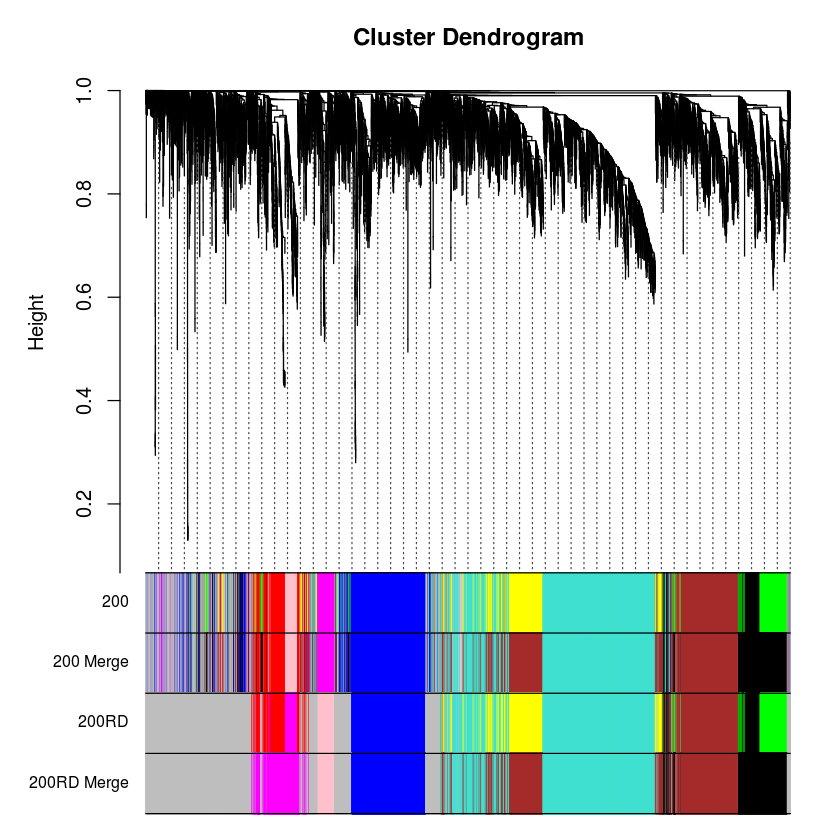

In [42]:
# Lets check the merging?
plotDendroAndColors(geneTree, cbind(dynamicColors200, mergedColors200, dynamicColors200RD, mergedColors200RD),
c("200", "200 Merge", "200RD", "200RD Merge"),
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

# Compare two trees directly 

In [34]:
# Lets check the merging?
plotDendroAndColors(geneTree_mean, cbind(dynamicColors150_mean, mergedColors150_mean),
c("150_mean", "150_mean_merged"),
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

ERROR: Error in cbind(dynamicColors150_mean, mergedColors150_mean): object 'dynamicColors150_mean' not found


In [ ]:
# Lets check the merging?
plotDendroAndColors(geneTree, cbind(dynamicColors200, mergedColors200, dynamicColors200RD, mergedColors200RD),
c("200", "200 Merge", "200RD", "200RD Merge"),
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

### Calculate module eigengenes

In [132]:
MEs0 = moduleEigengenes(datExpr, mergedColors200)$eigengenes
MEs0RD = moduleEigengenes(datExpr, mergedColors200RD)$eigengenes

### After a while of flailing around in R I decided to switch over to python so we will write out our data here

In [140]:
length(mergedColors200)

[1] 10946

In [141]:
dim(datExpr)

[1]    16 10946

In [134]:
write.table(datExpr, paste0(outdir, 'wgcna_rpkm.txt'), sep='\t')
write.table(MEs0, paste0(outdir, 'wgcna_module_eigengenes.txt'), sep='\t')
write.table(MEs0RD, paste0(outdir, 'wgcna_module_eigengenes_respect_dendro.txt'), sep='\t')
write.table(mergedColors200, paste0(outdir, 'wgcna_module_colors.txt'), sep='\t')
write.table(mergedColors200RD, paste0(outdir, 'wgcna_module_colors_respect_dendro.txt'), sep='\t')

### Lets move forward with the 200 non respect dendro setting...

In [50]:
# Define numbers of genes and samples
nGenes = ncol(datExpr);
nSamples = nrow(datExpr);
# Recalculate MEs with color labels
MEs0 = moduleEigengenes(datExpr, mergedColors200)$eigengenes

In [51]:
# Read in the clinical data for annotation
clinData = read.csv('/home/h1bennet/liverStrains/results/180111_RNA_Seq/amln_samples.txt', sep='\t')
clinData <- clinData[clinData$sample_type == 'kupffer', ]
dim(clinData)

[1] 16 11

In [135]:
# create combined data frame with clinical data and the module eigengenes.
MEClin = cbind(clinData, MEs0)
MEClinRD = cbind(clinData, MEs0RD)

In [55]:
require(ggplot2)

Loading required package: ggplot2


### Boxplot of "eigengene" values across strains
____
These basically encapsulate the overall relative expression of genes in these modules within the samples. the ME is defined as the first principal component of that specific module... not sure how to interpret that.

In [104]:
blue <- ggplot(MEClin, aes(x=group, y=MEblue)) + geom_jitter(width=0.2, height=0.2)
black <- ggplot(MEClin, aes(x=group, y=MEblack)) + geom_jitter(width=0.2, height=0.2)
brown <- ggplot(MEClin, aes(x=group, y=MEbrown)) + geom_jitter(width=0.2, height=0.2)
grey <- ggplot(MEClin, aes(x=group, y=MEgrey)) + geom_jitter(width=0.2, height=0.2)
magenta <- ggplot(MEClin, aes(x=group, y=MEmagenta)) + geom_jitter(width=0.2, height=0.2)
pink <- ggplot(MEClin, aes(x=group, y=MEpink)) + geom_jitter(width=0.2, height=0.2)
red <- ggplot(MEClin, aes(x=group, y=MEred)) + geom_jitter(width=0.2, height=0.2)
turquoise <- ggplot(MEClin, aes(x=group, y=MEturquoise)) + geom_jitter(width=0.2, height=0.2)

In [137]:
blueRD <- ggplot(MEClinRD, aes(x=group, y=MEblue)) + geom_jitter(width=0.2, height=0.2)
blackRD <- ggplot(MEClinRD, aes(x=group, y=MEblack)) + geom_jitter(width=0.2, height=0.2)
brownRD <- ggplot(MEClinRD, aes(x=group, y=MEbrown)) + geom_jitter(width=0.2, height=0.2)
greyRD <- ggplot(MEClinRD, aes(x=group, y=MEgrey)) + geom_jitter(width=0.2, height=0.2)
magentaRD <- ggplot(MEClinRD, aes(x=group, y=MEmagenta)) + geom_jitter(width=0.2, height=0.2)
pinkRD <- ggplot(MEClinRD, aes(x=group, y=MEpink)) + geom_jitter(width=0.2, height=0.2)
redRD <- ggplot(MEClinRD, aes(x=group, y=MEred)) + geom_jitter(width=0.2, height=0.2)
turquoiseRD <- ggplot(MEClinRD, aes(x=group, y=MEturquoise)) + geom_jitter(width=0.2, height=0.2)

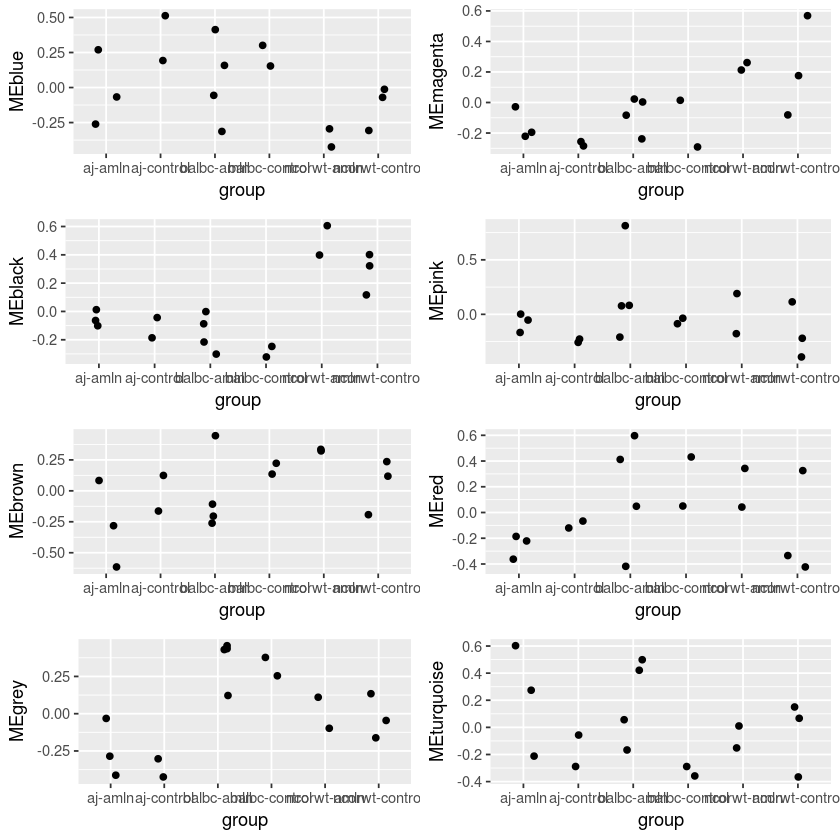

In [106]:
multiplot(blue, black, brown, grey, magenta, pink, red, turquoise, cols=2)

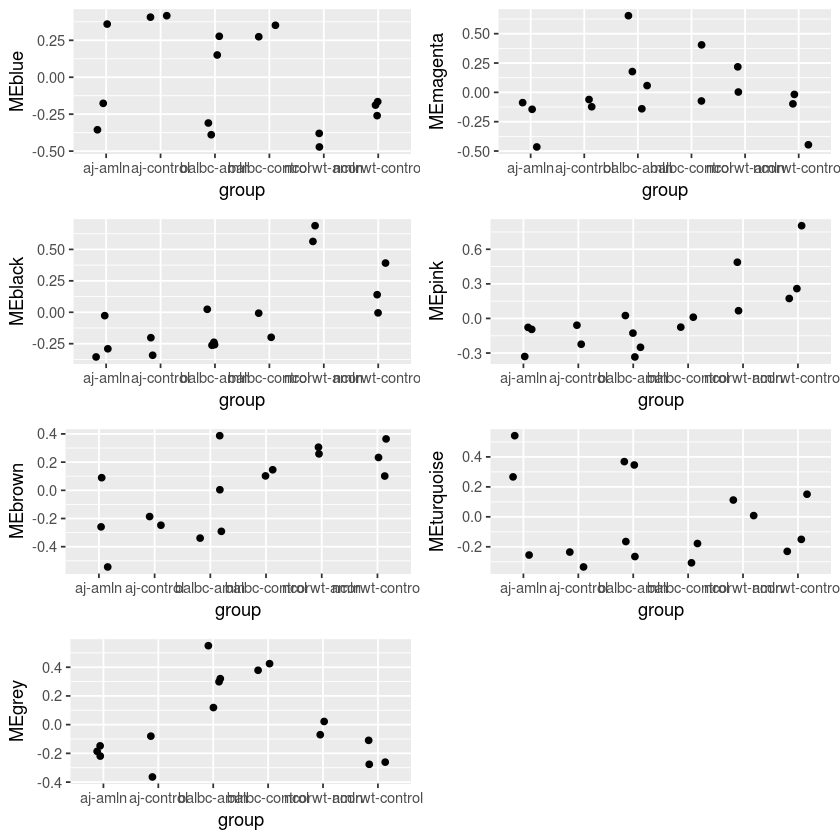

In [139]:
multiplot(blueRD, blackRD, brownRD, greyRD, magentaRD, pinkRD, turquoiseRD, cols=2)

### Boxplot of Gene Expression values for the different modules 

We will use the datExpr expression data for this (RPKM)

In [108]:
blue <- ggplot(MEClin, aes(x=group, y=MEblue)) + geom_jitter(width=0.2, height=0.2)
black <- ggplot(MEClin, aes(x=group, y=MEblack)) + geom_jitter(width=0.2, height=0.2)
brown <- ggplot(MEClin, aes(x=group, y=MEbrown)) + geom_jitter(width=0.2, height=0.2)
grey <- ggplot(MEClin, aes(x=group, y=MEgrey)) + geom_jitter(width=0.2, height=0.2)
magenta <- ggplot(MEClin, aes(x=group, y=MEmagenta)) + geom_jitter(width=0.2, height=0.2)
pink <- ggplot(MEClin, aes(x=group, y=MEpink)) + geom_jitter(width=0.2, height=0.2)
red <- ggplot(MEClin, aes(x=group, y=MEred)) + geom_jitter(width=0.2, height=0.2)
turquoise <- ggplot(MEClin, aes(x=group, y=MEturquoise)) + geom_jitter(width=0.2, height=0.2)

,mergedColors200,aj_KupfferTotal_RNA_polyA_AMLNDiet_30week_AJ3A_JSSTDT_16_09_26,aj_KupfferTotal_RNA_polyA_AMLNDiet_30week_AJ3B_JSSTDT_16_09_26,aj_KupfferTotal_RNA_polyA_AMLNDiet_30week_AJ3c_JSS_TDT_16_09_28,aj_KupfferTotal_RNA_polyA_ControlDiet_30week_AJ1c_JSS_TDT_16_09_28,aj_KupfferTotal_RNA_polyA_ControlDiet_30week_AJ1d_JSS_TDT_16_09_28,balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3a_JSS_TDT_16_09_28,balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3B_JSSTDT_16_09_26,balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3C_JSSTDT_16_09_26,balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3d_JSS_TDT_16_09_28,balbc_KupfferTotal_RNA_polyA_ControlDiet_30week_Balb1c_JSS_TDT_16_09_28,balbc_KupfferTotal_RNA_polyA_ControlDiet_30week_Balb1d_JSS_TDT_16_09_28,NCoRWT_KupfferTotal_RNA_polyA_AMLNDiet_30week_LN136C_JSS_TDT_16_09_19,NCoRWT_KupfferTotal_RNA_polyA_AMLNDiet_30week_LN141A_JSS_TDT_16_09_21,NCoRWT_KupfferTotal_RNA_polyA_ControlDiet_30week_LN134B_JSS_TDT_16_09_21,NCoRWT_KupfferTotal_RNA_polyA_ControlDiet_30week_LN134C_JSS_TDT_16_09_19,NCoRWT_KupfferTotal_RNA_polyA_ControlDiet_30week_LN134D_JSS_TDT_16_09_21
NM_021334,black,30.307,26.499,7.973,7.186,2.595,8.341,5.112,4.77,2.897,1.743,2.478,92.665,107.865,42.219,10.375,27.609
NM_178598,black,42.433,49.837,38.598,45.682,33.426,72.335,32.233,73.978,39.599,27.7,41.776,114.449,176.069,80.805,71.726,90.15
NM_008433,black,0.357,0.325,1.17,1.054,0.348,1.538,0.309,0.699,0.565,0.44,0.289,21.124,24.211,5.396,3.174,3.407
NM_010730,black,6.106,5.251,3.517,3.151,1.551,25.592,5.537,20.04,4.472,2.617,7.125,27.881,32.321,5.325,3.768,4.828
NM_018754,black,0.645,0.75,1.219,1.334,1.12,0.499,1.085,0.513,0.965,1.224,1.314,2.335,3.455,2.487,4.248,4.289
NR_045642,black,35.194,35.717,29.857,37.551,36.853,41.687,43.298,33.645,38.751,47.331,42.761,18.431,18.661,32.781,30.442,31.839


We keep crashing here so lets save the data so we can work with plotting

In [4]:
save(x, log2_x, colorExpr, clinData, mergedColors200, mergedColors200RD, file = paste0(outdir,"180123_WGCNA_Plotting.RData"))

ERROR: Error in save(x, log2_x, colorExpr, clinData, mergedColors200, mergedColors200RD, : objects ‘x’, ‘log2_x’, ‘colorExpr’, ‘clinData’, ‘mergedColors200’, ‘mergedColors200RD’ not found


In [5]:
pnames = load(paste0(outdir,"180123_WGCNA_Plotting.RData"))

In [12]:
require(RColorBrewer)

Loading required package: RColorBrewer


In [14]:
x = matrix(as.numeric(unlist(colorExpr[, 2:ncol(colorExpr)])), nrow=nrow(colorExpr))
log2_x = log2(x + 1)
bk <- c(-100,seq(0,100,by=10))
mycols <- c("red",colorRampPalette(colors = c("white","blue"))(length(bk)-2))

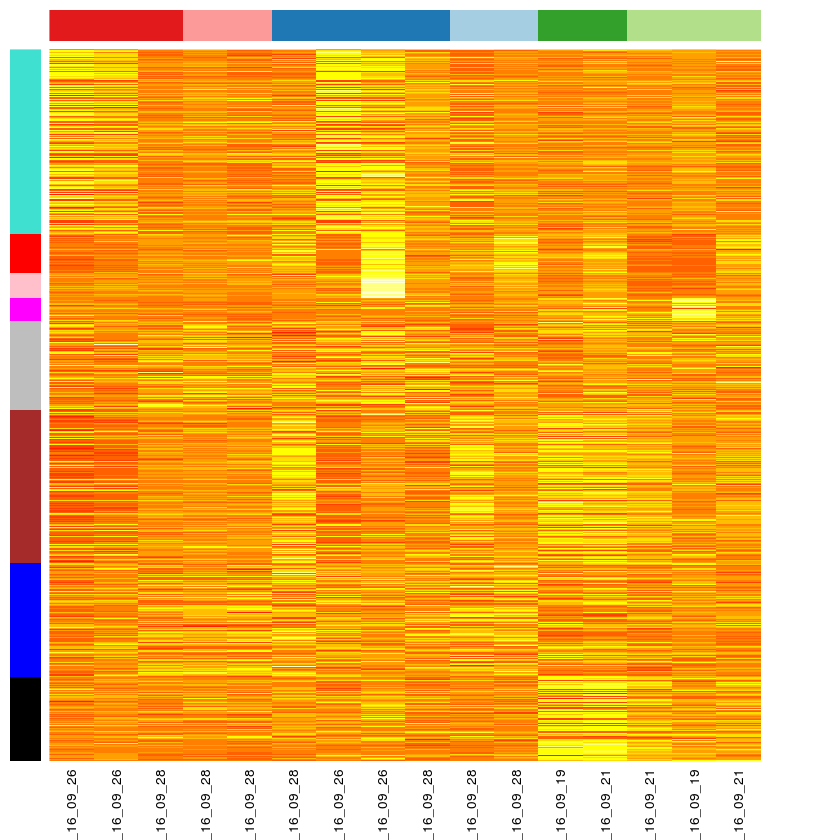

In [16]:
heatmap(x, Rowv=NA, Colv=NA, labCol=colnames(colorExpr[, 2:ncol(colorExpr)]), labRow=NA,
        RowSideColors = colorExpr[, 1], ColSideColors = clinData$color)

We will start with blue since those are genes that are highest in the balbc and aj controls

In [91]:
MEs = orderMEs(MEs0)
modNames = substring(names(MEs), 3)
geneModuleMembership = as.data.frame(cor(datExpr, MEs, use = "p"));

In [92]:
module = "blue"
column = match(module, modNames);
moduleGenes = mergedColors200==module;

In [95]:
head(geneModuleMembership[order(geneModuleMembership$MEblue, decreasing=TRUE), ], 10)

,MEblue,MEbrown,MEblack,MEmagenta,MEturquoise,MEpink,MEred,MEgrey
NM_027480,0.9749809,0.224438937,-0.6044184,-0.4353194,-0.6097289,-0.1530916,0.32290819,0.04866435
NM_001033342,0.9489203,0.038896525,-0.6838799,-0.4128968,-0.5610434,-0.1739002,0.20672153,-0.05538674
NM_031408,0.9458539,0.001285179,-0.7201431,-0.4155099,-0.4541673,-0.2010086,0.20314213,0.07917781
NR_027351,0.9375658,0.265658873,-0.5850584,-0.4965415,-0.5803018,-0.2045996,0.27952643,0.12560867
NM_001310516,0.9293883,-0.036569252,-0.7676017,-0.5106775,-0.4236309,-0.2022904,0.17732160,0.08837800
NM_001199025,0.9286572,0.225174605,-0.4853045,-0.2831416,-0.7218561,-0.3058695,0.14575931,-0.20581271
NM_199306,0.9253324,-0.105961313,-0.7838725,-0.5889532,-0.3872944,-0.2308569,0.08952527,-0.18719323
NM_001177812,0.9247678,0.341072237,-0.4536421,-0.2939258,-0.7090919,-0.2011298,0.30231347,-0.03054234
NM_010813,0.9245066,0.233938013,-0.4947600,-0.2560750,-0.7269467,-0.2607757,0.20455342,-0.04132739
NM_001159626,0.9235908,0.378169096,-0.4682423,-0.4175045,-0.6914123,-0.2061502,0.29531127,-0.02884689
